# Análisis Exploratorio de Datos (EDA) preliminar del dataset "Electric and Alternative Fuel Charging Stations.csv".

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y Primer Vistazo

In [25]:
file_path = '../Datasets/Electric and Alternative Fuel Charging Stations.csv'
data = pd.read_csv(file_path)
data.head(3)


C:\Users\etorre\AppData\Local\Temp\ipykernel_11564\3197611263.py:2: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN


### Diccionario de datos (solo columnas analizadas)
| Columna | Tipo de Dato | Descripción |
| --- | --- | --- |
| Fuel Type Code | object | Tipo de combustible de la estación (ej. ELEC, CNG, etc.). |
| Station Name | object | Nombre de la estación de carga. |
| Street Address | object | Dirección de la calle de la estación de carga. |
| City | object | Ciudad donde se encuentra la estación. |
| State | object | Estado o región donde se encuentra la estación. |
| ZIP | object | Código postal de la ubicación de la estación. |
| Access Days Time | object | Horario de acceso a la estación de carga. |
| EV Network | object | Red de estaciones de carga eléctrica a la que pertenece la estación. |
| Restricted Access | object | Indica si el acceso a la estación está restringido o no. |


In [8]:

summary = {
    "Dimensiones del DataFrame": data.shape,
    "Tipo de Datos por Columna": data.dtypes,
    "Cantidad de Valores Faltantes por Columna": data.isna().sum().sort_values(ascending=False),
    "Estadísticas Descriptivas Básicas": data.describe(include='all')
}


((70406, 65),
 Fuel Type Code                 object
 Station Name                   object
 Street Address                 object
 Intersection Directions        object
 City                           object
                                 ...  
 CNG PSI                        object
 CNG Vehicle Class              object
 LNG Vehicle Class              object
 EV On-Site Renewable Source    object
 Restricted Access              object
 Length: 65, dtype: object)

In [5]:
summary["Dimensiones del DataFrame"]

(70406, 65)

In [6]:
summary["Tipo de Datos por Columna"]

Fuel Type Code                 object
Station Name                   object
Street Address                 object
Intersection Directions        object
City                           object
                                ...  
CNG PSI                        object
CNG Vehicle Class              object
LNG Vehicle Class              object
EV On-Site Renewable Source    object
Restricted Access              object
Length: 65, dtype: object

In [9]:
summary["Cantidad de Valores Faltantes por Columna"]

Plus4                           70406
BD Blends (French)              70404
EV Other Info                   70357
LNG On-Site Renewable Source    70344
Hydrogen Status Link            70323
                                ...  
ID                                  0
Updated At                          0
Station Name                        0
Country                             0
Fuel Type Code                      0
Length: 65, dtype: int64

### Resultados:
El conjunto de datos tiene 70,406 filas y 65 columnas. <br>
La mayoría de las columnas son de tipo objeto (cadena de texto), lo que indica que contienen datos textuales o categóricos. Algunas columnas clave son:

Fuel Type Code<br>
Station Name<br>
Street Address<br>
City<br>
State<br>
ZIP Code<br>
Station Phone<br>
Status Code<br>
Access Days Time<br>
EV Network<br>
Estas columnas sugieren información sobre la ubicación de las estaciones de carga, tipos de combustible, acceso y redes de carga para vehículos eléctricos.

El resumen de los datos revela varios puntos clave:
<br>
**Valores Faltantes:** Algunas columnas tienen una cantidad significativa de valores faltantes. Por ejemplo, "Intersection Directions" tiene 65,913 valores faltantes de 70,406 entradas. Esto sugiere que ciertas columnas pueden requerir atención especial, como imputación o eliminación.
<br>
**Distribución de Datos:** La columna "Fuel Type Code" tiene principalmente el valor "ELEC", indicando una predominancia de estaciones de carga eléctrica. Además, hay columnas con una gran cantidad de valores únicos, como "Station Name" y "Street Address", lo que indica una amplia variedad de ubicaciones y nombres de estaciones.
<br>
**Datos Categóricos y Numéricos:** La mayoría de las columnas son categóricas (tipo de datos "object"). Algunas columnas numéricas, como "ZIP" (código postal), pueden requerir un tratamiento especial, ya que en realidad representan categorías y no valores continuos.

In [22]:
summary["Estadísticas Descriptivas Básicas"]

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
count,70406,70406,70405,4492,70406,70406,70405,0.0,65204,70406,...,2032,1826,116,116,1603,1597,1622,158,370,53435
unique,7,62835,52295,4034,8278,65,22182,NaN,17059,3,...,140,4,2,2,3,5,3,1,6,2
top,ELEC,Casey's General Store,5515 Overland Ave,.\n,Los Angeles,CA,94025,NaN,888-758-4389,E,...,Gratuit,"[""ACME""]","[""700""]","[""J2601""]",Q,3600,HD,HD,SOLAR,False
freq,60907,935,118,39,1586,16106,363,NaN,29547,69188,...,1499,1007,71,115,1155,1126,1331,158,252,52181
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Valores duplicados

In [14]:

duplicates = data.duplicated().sum()
print(f'Número de registros duplicados: {duplicates}')


Número de registros duplicados: 0


### Outliers


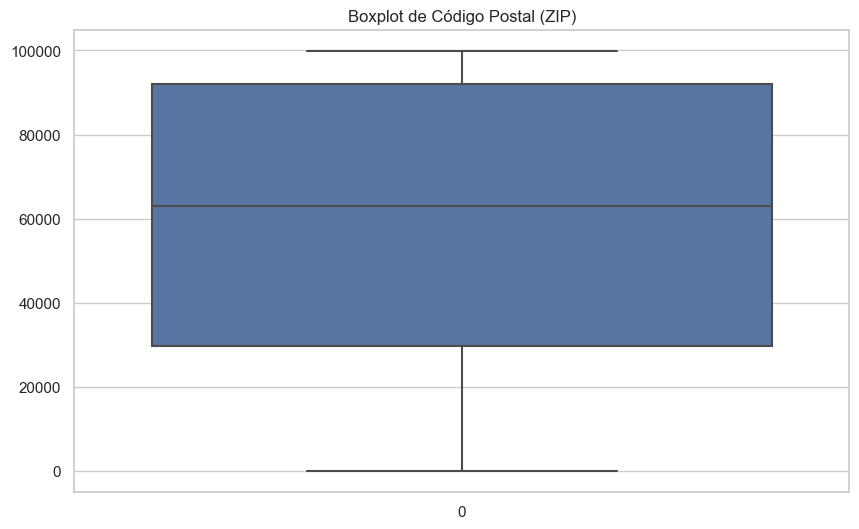

In [15]:
# Convertir la columna 'ZIP' a numérica (ignorando errores para manejar valores no numéricos)
data['ZIP'] = pd.to_numeric(data['ZIP'], errors='coerce')

# Visualización de outliers utilizando un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data['ZIP'])
plt.title('Boxplot de Código Postal (ZIP)')
plt.show()

## Análisis Disponibilidad Infraestructura de carga

Para este analisis nos centraremos en las siguientes áreas clave del conjunto de datos:

**Tipos de Estaciones de Carga**: Analizar la distribución de los diferentes tipos de estaciones de carga (por ejemplo, eléctrica, gas natural comprimido (CNG), etc.), utilizando la columna "Fuel Type Code".

**Ubicaciones Geográficas**: Examinar la distribución geográfica de las estaciones de carga, enfocándonos en columnas como "City", "State", y "ZIP" para entender dónde están más concentradas estas infraestructuras.

**Disponibilidad y Acceso**: Investigar la disponibilidad de las estaciones de carga, que puede incluir el análisis de columnas como "Access Days Time", "EV Network", y "Restricted Access".

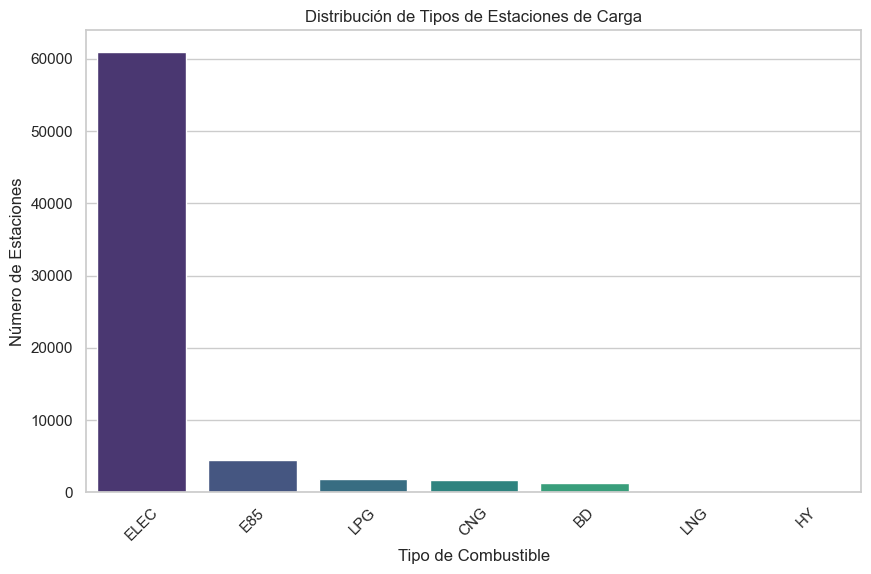

Fuel Type Code
ELEC    60907
E85      4508
LPG      1867
CNG      1631
BD       1218
LNG       158
HY        117
Name: count, dtype: int64

In [12]:
sns.set(style="whitegrid")

fuel_type_counts = data['Fuel Type Code'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette="viridis")
plt.title('Distribución de Tipos de Estaciones de Carga')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Número de Estaciones')
plt.xticks(rotation=45)
plt.show()

fuel_type_counts


### Resultados
La visualización muestra la distribución de los diferentes tipos de estaciones de carga en el conjunto de datos:

**ELEC (Eléctrico):** Con 60,907 estaciones, es el tipo más común, lo que refleja una amplia disponibilidad de infraestructura de carga eléctrica.<br>
**E85 (Etanol)**: El segundo más común con 4,508 estaciones.<br>
**LPG (Gas Licuado de Petróleo)**: Con 1,867 estaciones.<br>
**CNG (Gas Natural Comprimido)**: Representa 1,631 estaciones.<br>
**BD (Biodiésel)**: Cuenta con 1,218 estaciones.<br>
**LNG (Gas Natural Licuado) y HY (Hidrógeno)**: Son los menos comunes, con 158 y 117 estaciones, respectivamente.<br>

## Análisis de distribución geográfica de las estaciones de carga

Nos centraremos en las ubicaciones por estado y ciudad, para comprender mejor dónde se concentra esta infraestructura. Esto nos proporcionará una visión más clara de la disponibilidad geográfica de las estaciones de carga en diferentes regiones. 

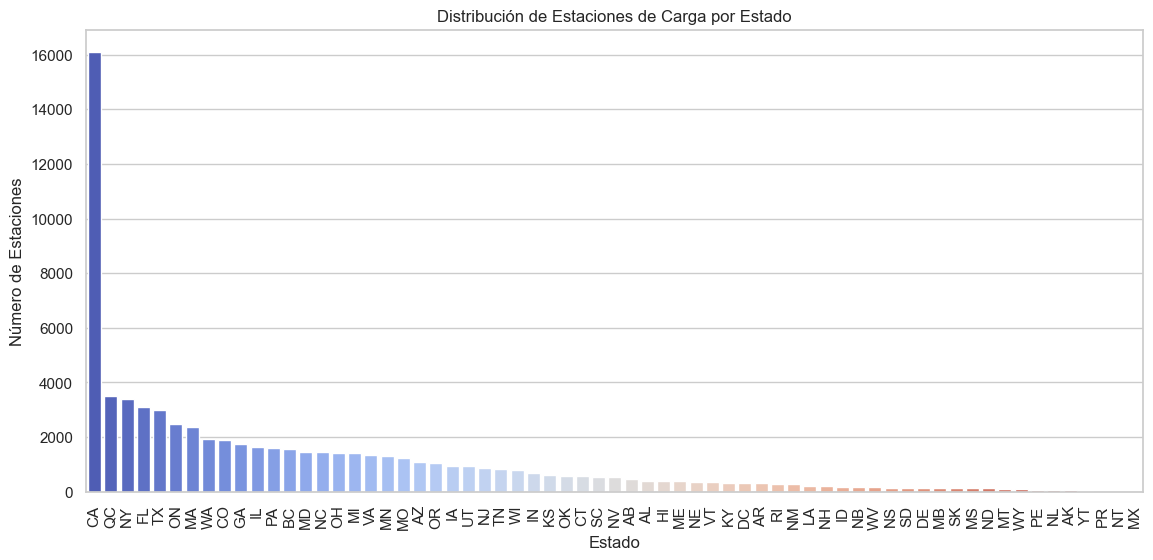

State
CA    16106
QC     3502
NY     3409
FL     3113
TX     3002
ON     2472
MA     2385
WA     1916
CO     1894
GA     1763
Name: count, dtype: int64

In [20]:
# Distribución de Estaciones de Carga por Estado
state_counts = data['State'].value_counts()
city_counts = data['City'].value_counts().head(20)

plt.figure(figsize=(30, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=state_counts.index, y=state_counts.values, palette="coolwarm")
plt.title('Distribución de Estaciones de Carga por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Estaciones')
plt.xticks(rotation=90)
plt.show()

state_counts.head(10)

### Resultados:
La distribución geográfica de las estaciones de carga revela una concentración significativa en ciertas áreas:

**Top 10 Estados con Más Estaciones de Carga**<br><br>
California (CA): 16,106 estaciones.<br>
Quebec (QC): 3,502 estaciones.<br>
Nueva York (NY): 3,409 estaciones.<br>
Florida (FL): 3,113 estaciones.<br>
Texas (TX): 3,002 estaciones.<br>
Ontario (ON): 2,472 estaciones.<br>
Massachusetts (MA): 2,385 estaciones.<br>
Washington (WA): 1,916 estaciones.<br>
Colorado (CO): 1,894 estaciones.<br>
Georgia (GA): 1,763 estaciones.<br>

### Top 20 Ciudades con Estaciones de Carga

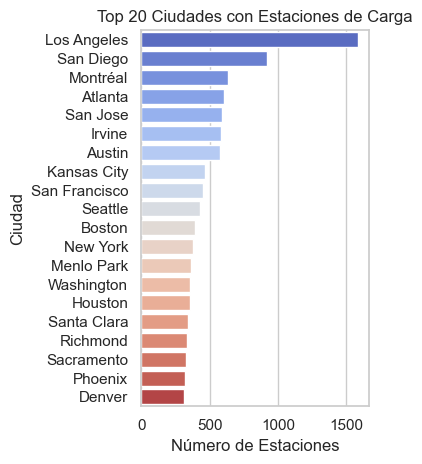

City
Los Angeles      1586
San Diego         918
Montréal          635
Atlanta           608
San Jose          587
Irvine            580
Austin            579
Kansas City       463
San Francisco     453
Seattle           429
Name: count, dtype: int64

In [21]:
# 'Top 20 Ciudades con Estaciones de Carga'
plt.subplot(1, 2, 2)
sns.barplot(x=city_counts.values, y=city_counts.index, palette="coolwarm")
plt.title('Top 20 Ciudades con Estaciones de Carga')
plt.xlabel('Número de Estaciones')
plt.ylabel('Ciudad')

plt.tight_layout()
plt.show()

city_counts.head(10)


### Resultados:
**Top 10 Ciudades con Más Estaciones de Carga** <br>
<br>
Los Ángeles: 1,586 estaciones.<br>
San Diego: 918 estaciones.<br>
Montréal: 635 estaciones.<br>
Atlanta: 608 estaciones.<br>
San José: 587 estaciones.<br>
Irvine: 580 estaciones.<br>
Austin: 579 estaciones.<br>
Kansas City: 463 estaciones.<br>
San Francisco: 453 estaciones.<br>
Seattle: 429 estaciones.<br>

## Análisis de la disponibilidad y el acceso a las estaciones de carga en el estado de Nueva York (NY)

In [23]:
# Filtrar los datos para el estado de Nueva York (NY)
data_ny = data[data['State'] == 'NY']

In [24]:
# Resumen de los horarios de acceso
access_days_time_summary = data_ny['Access Days Time'].value_counts()

# Resumen de la red de EV
ev_network_summary = data_ny['EV Network'].value_counts()

# Resumen del acceso restringido
restricted_access_summary = data_ny['Restricted Access'].value_counts()

access_days_time_summary.head(), ev_network_summary.head(), restricted_access_summary.head()


(Access Days Time
 24 hours daily                                                                                                   2244
 24 hours daily; see valet for access                                                                              163
 MON: 24 hours | TUE: 24 hours | WED: 24 hours | THU: 24 hours | FRI: 24 hours | SAT: 24 hours | SUN: 24 hours     103
 24 hours daily; for customer use only; see front desk for access                                                   98
 24 hours daily; pay lot; see valet for access                                                                      80
 Name: count, dtype: int64,
 EV Network
 ChargePoint Network    1627
 Tesla Destination       472
 EV Connect              334
 Non-Networked           269
 LIVINGSTON              190
 Name: count, dtype: int64,
 Restricted Access
 False    2624
 True       33
 Name: count, dtype: int64)

### Resultado:
**Horarios de Acceso (Access Days Time)**<br>
24 horas diarias: La mayoría de las estaciones (2,244) están disponibles las 24 horas del día.<br>
24 horas con acceso a través de valet: 163 estaciones requieren contactar al valet para acceder.<br>
Horario específico durante toda la semana: 103 estaciones tienen disponibilidad las 24 horas durante todos los días de la semana.<br>
24 horas para clientes; acceso a través de la recepción: 98 estaciones son para uso de clientes y requieren contactar a la recepción.<br>
24 horas en estacionamiento de pago; acceso a través de valet: 80 estaciones están en estacionamientos de pago y requieren contactar al valet.<br>
<br>
**Red de EV (EV Network)**<br>
ChargePoint Network: 1,627 estaciones están en la red de ChargePoint.<br>
Tesla Destination: 472 estaciones pertenecen a la red de Tesla Destination.<br>
EV Connect: 334 estaciones están en la red de EV Connect.<br>
Non-Networked: 269 estaciones no están en una red específica.<br>
LIVINGSTON: 190 estaciones están en la red de LIVINGSTON.<br>
<br>
**Acceso Restringido (Restricted Access)**<br>
No Restringido: La mayoría de las estaciones (2,624) no tienen restricciones de acceso.<br>
Restringido: Solo 33 estaciones tienen acceso restringido.<br>
<br>

## Conclusiones:
1. Estos resultados muestran una fuerte presencia de infraestructura de carga en estados y ciudades específicos, con una marcada predominancia en California y en grandes áreas metropolitanas. Esta información puede ser útil para entender las regiones con mejor infraestructura de carga y potencialmente identificar áreas con necesidades de expansión.
<br>
2. El análisis de la disponibilidad y el acceso a las estaciones de carga en el estado de Nueva York, nos muestra una alta disponibilidad de estaciones de carga en el estado de Nueva York, con la mayoría disponibles las 24 horas del día y accesibles sin restricciones significativas. La presencia de varias redes de carga, como ChargePoint y Tesla, también indica una buena cobertura de servicios de carga para diferentes tipos de vehículos eléctricos. ​